In [1]:

import pandas_datareader.data as web
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
type(pd.DataFrame())
# type(2)

pandas.core.frame.DataFrame

In [8]:
x = 4
x > 0 or not x == 5

True

In [ ]:
def countdown(n):
    if n <= 0:
        print('Acabou!')
    else:
        print(n)
        countdown(n-1)

In [ ]:
class IPayment():
    paymentType = str
    value = float
    
    def get_paymentType(self):
        return str(self.paymentType).replace('-', '_')
    
class AbstractPayment(IPayment):
    pass
    
class CreditCardPayment(IPayment):
    numberOfInstallments = int
    
    def __init__(self) -> None:
        self.paymentType = 'New-Credit'

In [2]:
# sobrescrevendo as funcoes do yahoo finance pela funcçoes da biblioteca pandas_datareader
yf.pdr_override()

In [9]:
type(web)

module

In [3]:
df_ibov = web.get_data_yahoo('^BVSP')

[*********************100%***********************]  1 of 1 completed


In [5]:
df_ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-22,105499.0,105711.0,104386.0,105244.0,105244.0,8052900
2021-12-23,105251.0,105453.0,104637.0,104868.0,104868.0,7283600
2021-12-27,104892.0,105694.0,104798.0,105531.0,105531.0,7594900
2021-12-28,105555.0,105652.0,104503.0,104864.0,104864.0,7509000
2021-12-29,104863.0,105190.0,103851.0,104107.0,104107.0,6590000


## web scrapping

In [ ]:
import time
import pandas as pd
from selenium import webdriver

options = webdriver.ChromeOptions()
prefs = {"download.default_directory":"/home/henrique/workspace/ceusmar/pos-graduacao/python/repo/yahoo-finace"}

options.add_experimental_option("prefs",prefs)
driver = webdriver.Chrome(executable_path='/home/henrique/apps/chromedriver_linux64/chromedriver', chrome_options=options)

driver.get("https://sistemaswebb3-listados.b3.com.br/indexPage/day/IBOV?language=pt-br")
btn_download = driver.find_element_by_partial_link_text('Download')
btn_download.click()

time.sleep(3)

driver.close()

In [ ]:
df = pd.read_csv('IBOVDia_30-12-21.csv', sep=';', skiprows=1)
df.head()

<AxesSubplot:xlabel='Date'>

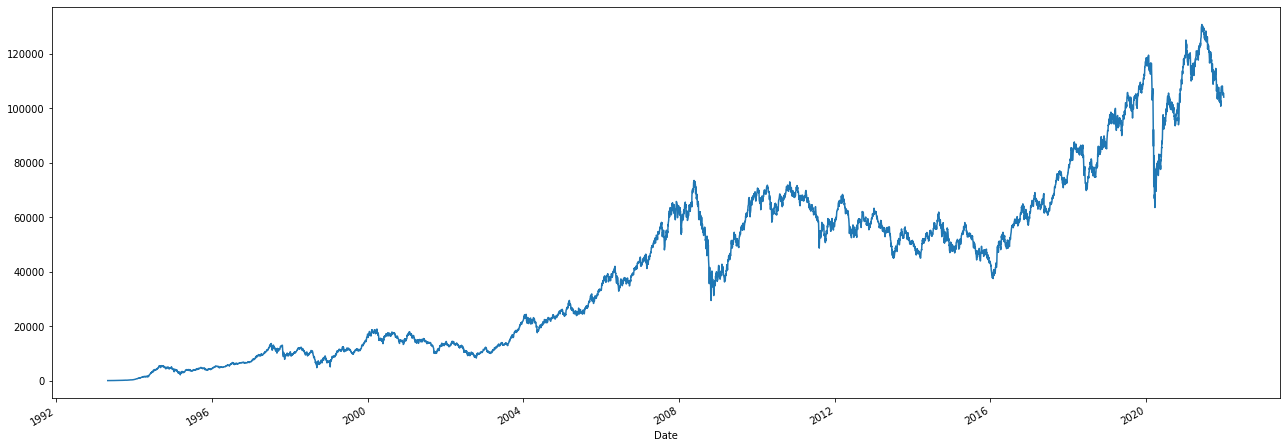

In [4]:
df_ibov['Close'].plot(figsize=(22,8))

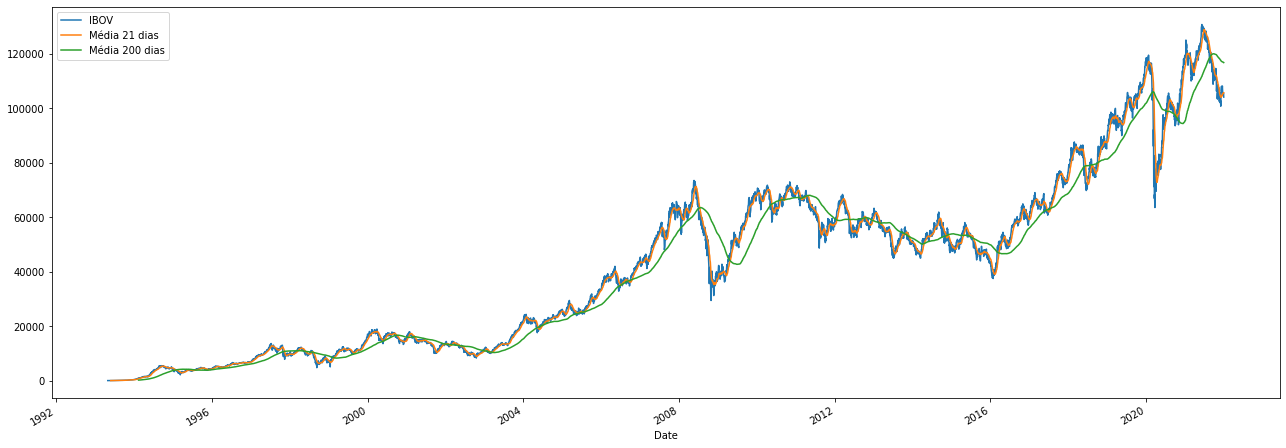

In [8]:
df_ibov['Close'].plot(figsize=(22,8), label='IBOV')
df_ibov['Close'].rolling(21).mean().plot(label='Média 21 dias')
df_ibov['Close'].rolling(200).mean().plot(label='Média 200 dias')
plt.legend()

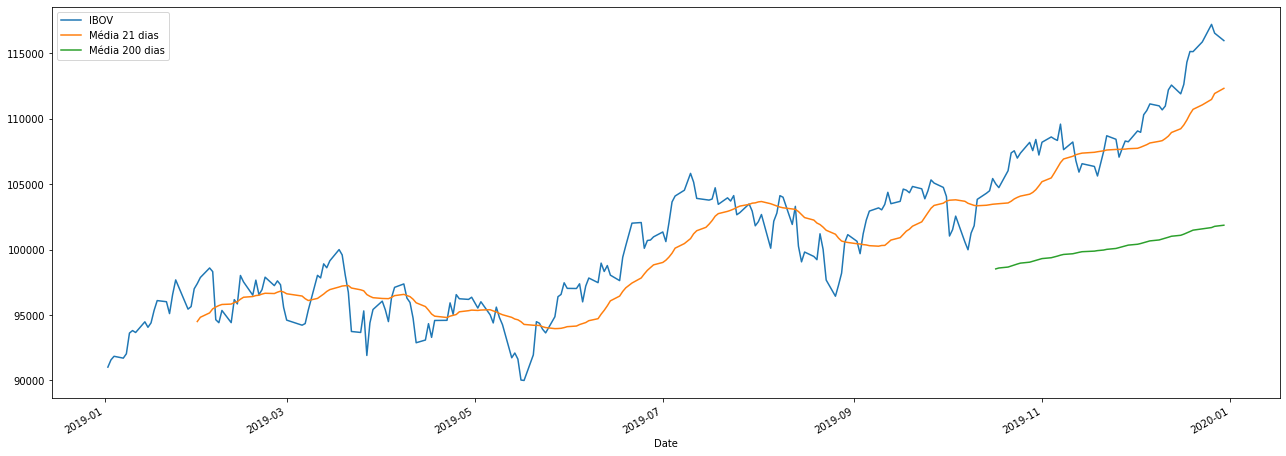

In [8]:
df_ibov_2019 = df_ibov[df_ibov.index.year == 2019]

df_ibov_2019['Close'].plot(figsize=(22,8), label='IBOV')
df_ibov_2019['Close'].rolling(21).mean().plot(label='Média 21 dias')
df_ibov_2019['Close'].rolling(200).mean().plot(label='Média 200 dias')
plt.legend()

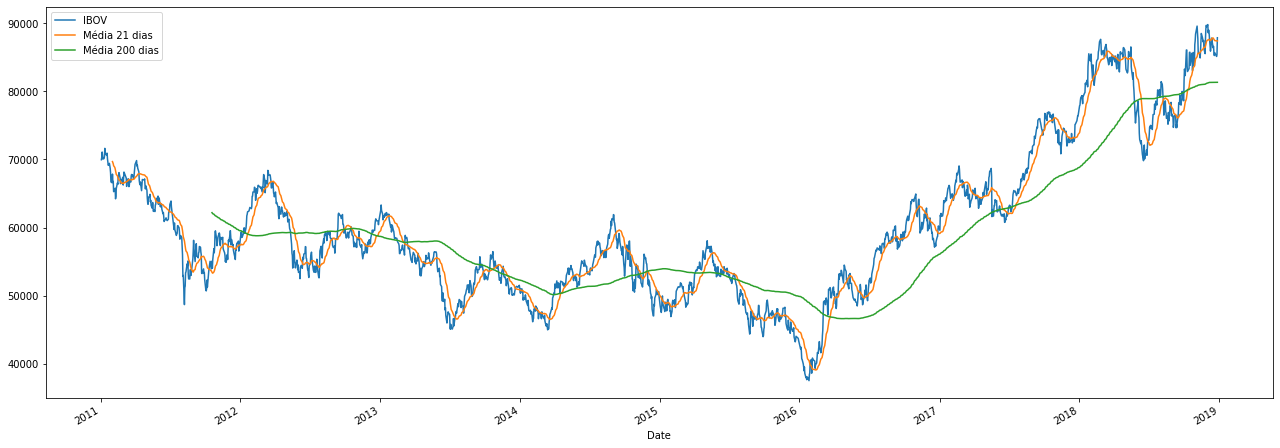

In [9]:
df_ibov_9 = df_ibov[(df_ibov.index.year > 2010) & (df_ibov.index.year < 2019)]

df_ibov_9['Close'].plot(figsize=(22,8), label='IBOV')
df_ibov_9['Close'].rolling(21).mean().plot(label='Média 21 dias')
df_ibov_9['Close'].rolling(200).mean().plot(label='Média 200 dias')
plt.legend()

In [10]:
df_petr4 = web.get_data_yahoo('PETR4.SA', start='2010-01-01', end='2019-12-31')

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/henrique/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/home/henrique/anaconda3/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/home/henrique/anaconda3/lib/python3.8/site-packages/multitasking/__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "/home/henrique/anaconda3/lib/python3.8/site-packages/yfinance/multi.py", line 188, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "/home/henrique/anaconda3/lib/python3.8/site-packages/yfinance/multi.py", line 202, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "/home/henrique/anaconda3/lib/python3.8/site-packages/yfinance/base.py", line 194, in history
    data = data.json()
  File "/home/henrique/anaconda3/lib/python3.8/site-packages/requ

KeyboardInterrupt: 

In [ ]:
df_petr4.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-20,30.600000,30.600000,30.020000,30.26,24.257549,93064900
2019-12-23,30.190001,30.500000,30.030001,30.50,24.449940,21970200
2019-12-26,30.590000,30.930000,30.500000,30.91,24.778610,24810500
2019-12-27,30.690001,30.920000,30.290001,30.52,24.804573,24995100
2019-12-30,30.549999,30.709999,30.150000,30.18,24.528244,22111600


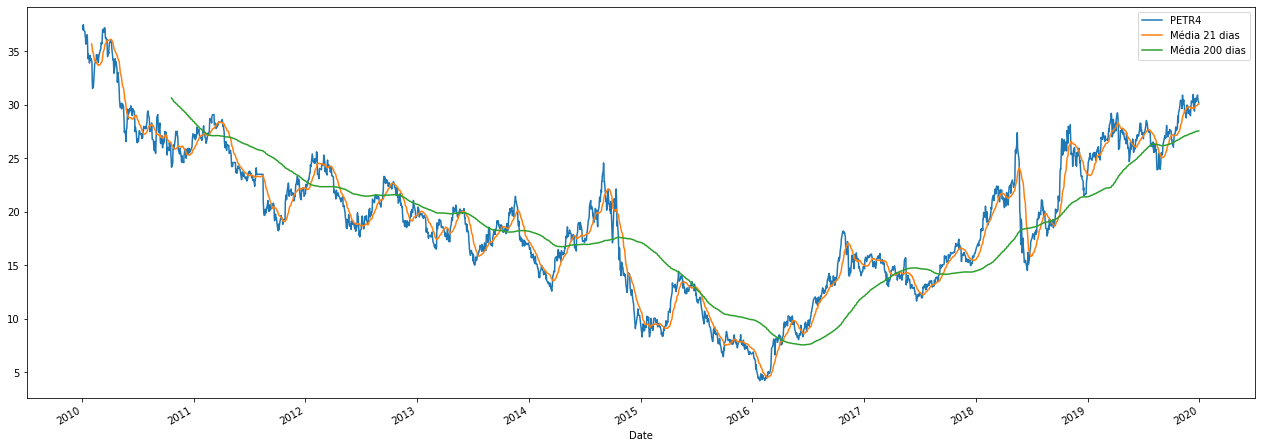

In [ ]:
df_petr4['Close'].plot(figsize=(22,8), label='PETR4')
df_petr4['Close'].rolling(21).mean().plot(label='Média 21 dias')
df_petr4['Close'].rolling(200).mean().plot(label='Média 200 dias')
plt.legend()

## Correlação de ativos

In [ ]:
tickers = ['^BVSP', "USDBRL=X"]

carteira = web.get_data_yahoo(tickers)['Close']

[*********************100%***********************]  2 of 2 completed


In [ ]:
carteira.tail()

,USDBRL=X,^BVSP
Date,,
2021-12-06,5.650099,106859.000000
2021-12-07,5.688000,107558.000000
2021-12-08,5.611800,108096.000000
2021-12-09,5.531600,106291.242188
2021-12-10,5.587700,NaN


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

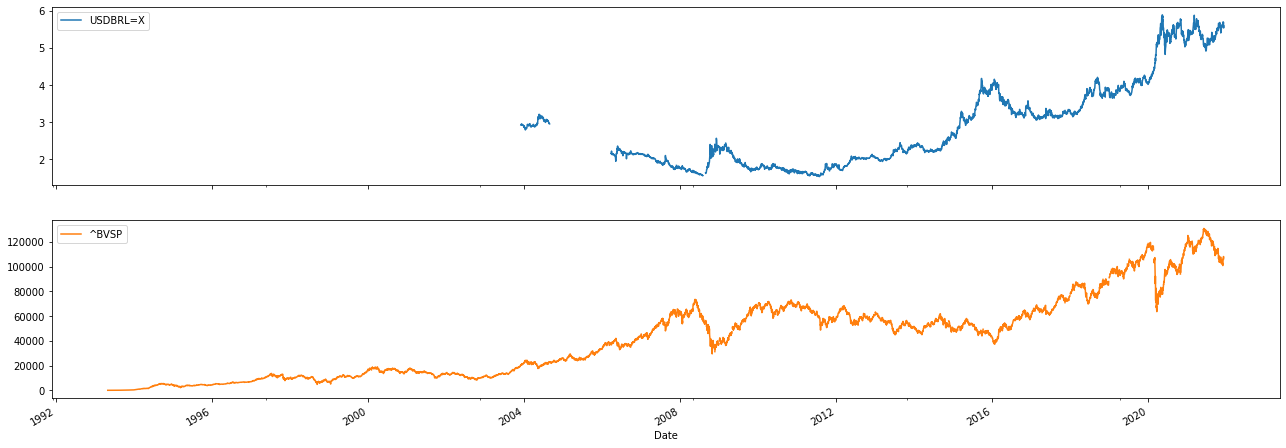

In [ ]:
carteira.plot(subplots=True, figsize=(22,8))

In [ ]:
tickers = ['^BVSP', "USDBRL=X"]

carteira = web.get_data_yahoo(tickers, start='2007-01-01')['Close']


[*********************100%***********************]  2 of 2 completed


In [ ]:
carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3661 entries, 2007-01-02 to 2021-12-09
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   USDBRL=X  3661 non-null   float64
 1   ^BVSP     3661 non-null   float64
dtypes: float64(2)
memory usage: 85.8 KB


In [ ]:
carteira = carteira.dropna()
carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3661 entries, 2007-01-02 to 2021-12-09
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   USDBRL=X  3661 non-null   float64
 1   ^BVSP     3661 non-null   float64
dtypes: float64(2)
memory usage: 85.8 KB


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

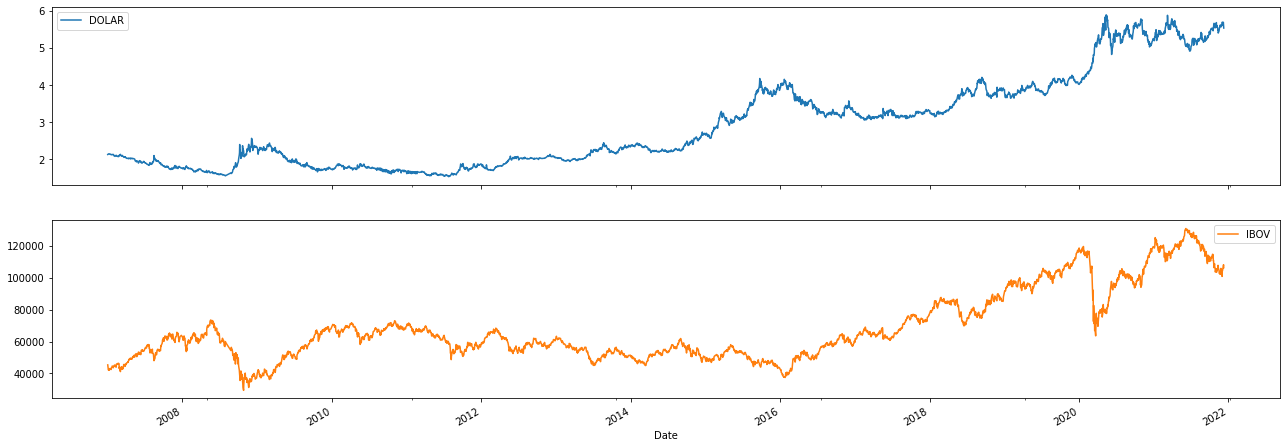

In [ ]:
carteira.columns = ['DOLAR', 'IBOV']
carteira.plot(subplots=True, figsize=(22,8))

In [ ]:
import seaborn as sns

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

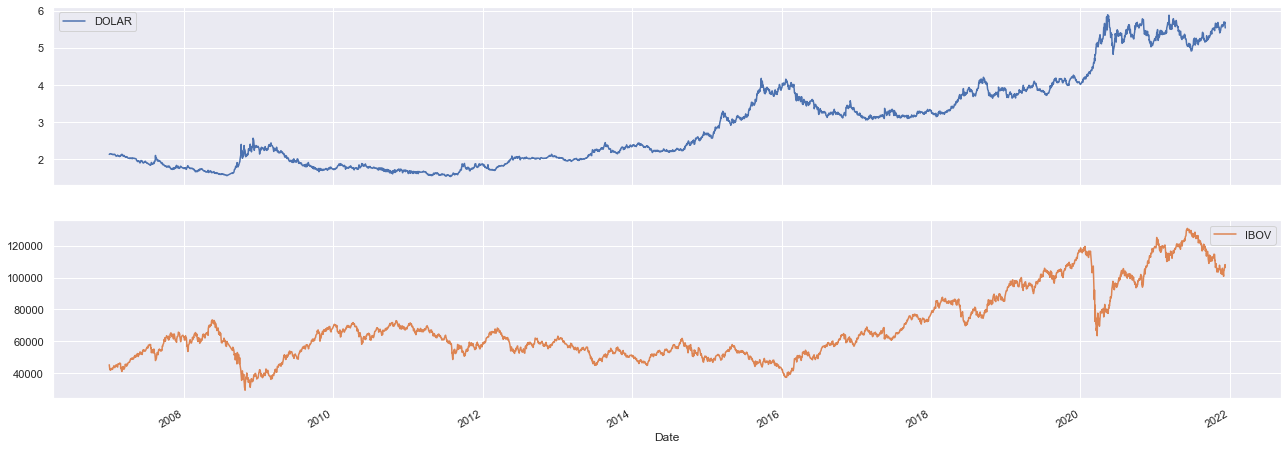

In [ ]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8))

In [ ]:
carteira.corr()

,DOLAR,IBOV
DOLAR,1.000000,0.715703
IBOV,0.715703,1.000000


<AxesSubplot:>

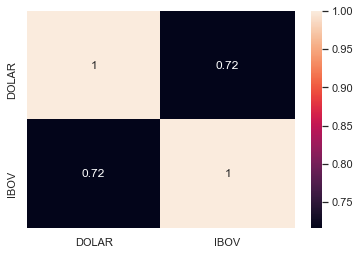

In [ ]:
sns.heatmap(carteira.corr(), annot=True)

In [ ]:
corr_janela_temporal = carteira['DOLAR'].rolling(252).corr(carteira['IBOV'])

<AxesSubplot:xlabel='Date'>

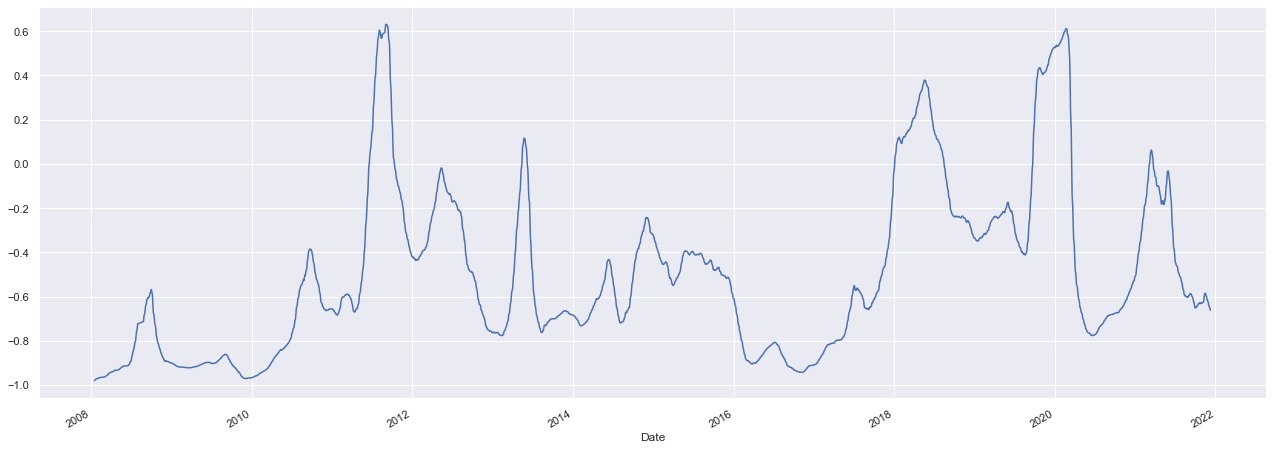

In [ ]:
corr_janela_temporal.plot(figsize=(22,8))

In [ ]:
# indice dolarizado

carteira['IBOV_DOLARIZADO'] = (carteira['IBOV'] / carteira['DOLAR'])
carteira.tail()

,DOLAR,IBOV,IBOV_DOLARIZADO
Date,,,
2021-12-03,5.643322,104466.000000,18511.437087
2021-12-06,5.650099,106859.000000,18912.766621
2021-12-07,5.688000,107558.000000,18909.633646
2021-12-08,5.611800,108096.000000,19262.268126
2021-12-09,5.531600,106291.242188,19215.279886


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

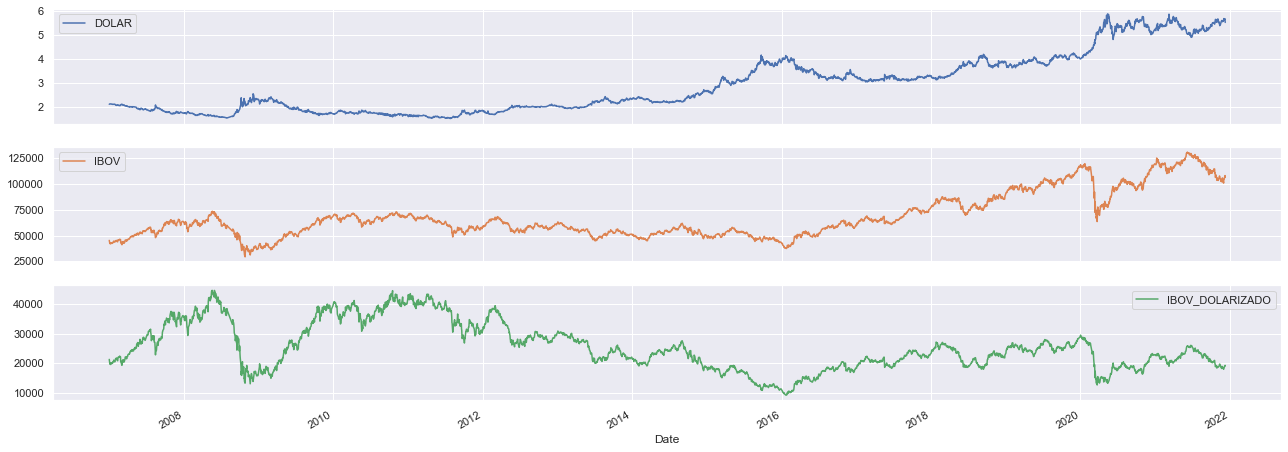

In [ ]:
carteira.plot(subplots=True, figsize=(22,8))

In [ ]:
tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA"

carteira = yf.download(tickers, period="5y")["Adj Close"]

ibov = yf.download("^BVSP", period="5y")["Adj Close"]

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
carteira.tail()

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2021-12-03,16.00,9.85,14.23,71.870003,32.779999
2021-12-06,16.08,9.97,14.78,75.769997,33.009998
2021-12-07,16.10,9.88,14.92,76.330002,34.560001
2021-12-08,16.08,9.91,15.05,75.760002,36.040001
2021-12-09,15.81,9.68,14.94,75.180000,36.500000


In [ ]:
ibov.tail()

Date
2021-12-03    104466.000000
2021-12-06    106859.000000
2021-12-07    107558.000000
2021-12-08    108096.000000
2021-12-09    106291.242188
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

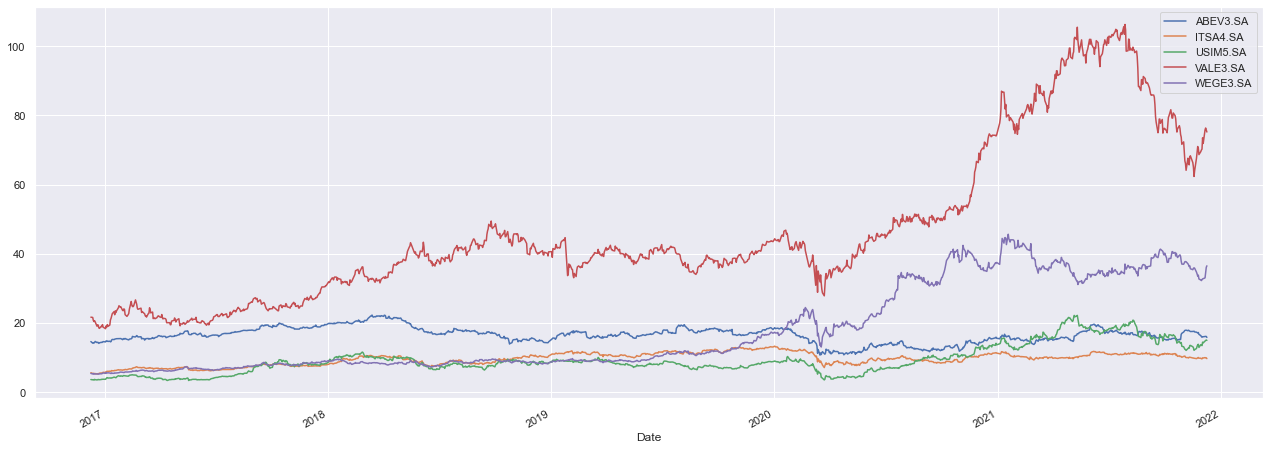

In [ ]:
carteira.plot(figsize=(22,8))

In [ ]:
carteira_normalizada = (carteira / carteira.iloc[0]) * 1000
carteira_normalizada.head()

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2016-12-09,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
2016-12-12,968.149150,960.714409,980.000025,995.947460,972.937158
2016-12-13,978.966527,965.476376,990.000144,956.771470,989.438960
2016-12-14,971.153922,959.523790,962.500014,941.573873,960.395746
2016-12-15,980.769325,959.523790,1012.500149,953.394383,977.557701


<AxesSubplot:xlabel='Date'>

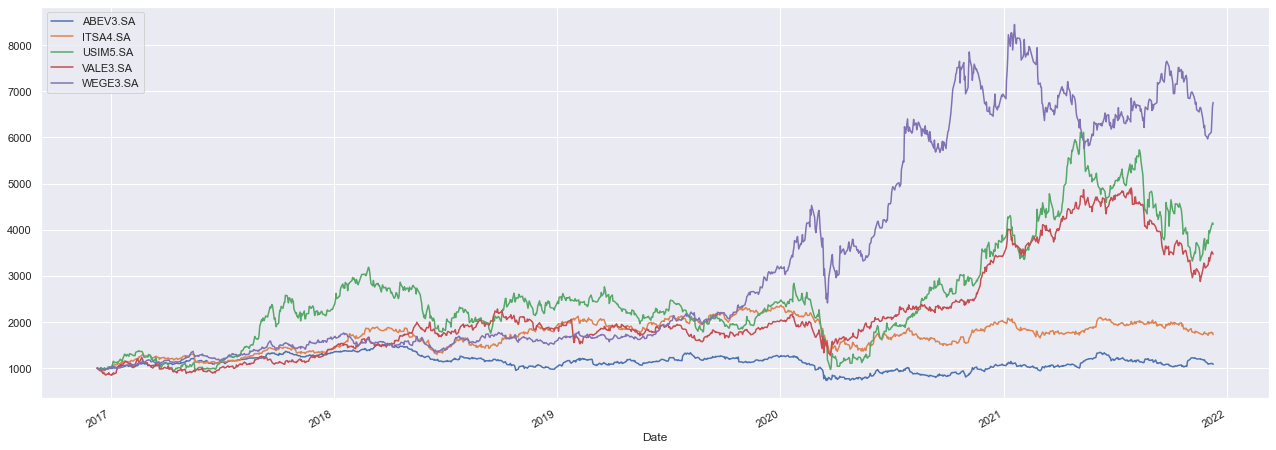

In [ ]:
carteira_normalizada.plot(figsize=(22,8))

In [ ]:
ibov_normalizada = (ibov / ibov.iloc[0]) * 5000
ibov_normalizada.head()

Date
2016-12-09    5000.000000
2016-12-12    4890.745608
2016-12-13    4899.175220
2016-12-14    4810.829573
2016-12-15    4826.035933
Name: Adj Close, dtype: float64

In [ ]:
carteira_normalizada['saldo'] = carteira_normalizada.sum(axis=1)
carteira_normalizada.head()

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo
Date,,,,,,
2016-12-09,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,5000.000000
2016-12-12,968.149150,960.714409,980.000025,995.947460,972.937158,4877.748201
2016-12-13,978.966527,965.476376,990.000144,956.771470,989.438960,4880.653477
2016-12-14,971.153922,959.523790,962.500014,941.573873,960.395746,4795.147345
2016-12-15,980.769325,959.523790,1012.500149,953.394383,977.557701,4883.745347


In [ ]:
carteira_normalizada['saldo'].plot(figsize=(22,8), label='carteira')
ibov_normalizada.plot(figsize=(22,8), legend='IBOV')
plt.legend()

NameError: name 'carteira_normalizada' is not defined